<a href="https://colab.research.google.com/github/tashfeenMustafa/PCA-Image-Audio-Text-Data/blob/main/DataMining_FinalProject_Reddit_Comments_Dataset_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Getting the Reddit Comments Text Data and extracting relevant information

Dataset URL: https://www.kaggle.com/kaggle/reddit-comments-may-2015

In [ ]:
!pip install langdetect

     |████████████████████████████████| 981 kB 5.2 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=b68400a5a390c066f2f9eeb22feb5564bb40dd10e3545aeefc634000780dd90d
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Getting dataset

In [ ]:
import os
import sqlite3
import pandas as pd
from langdetect import detect
from google.colab import drive

query = 'Select rowid, parent_id, subreddit, body, author, score from May2015 LIMIT 39999;'
path = '/content/drive/MyDrive/reddit_comments_dataset/'

# go to path
os.chdir(path)

# Read sqlite query results into a pandas DataFrame
cursor = sqlite3.connect(path + 'database.sqlite')
dataframe = pd.read_sql_query(query, cursor)
cursor.close()

# Verify that result of SQL query is stored in the dataframe
reddit_dataset = dataframe.values.tolist()

# Extracting relevant data from dataset
comments = []
parents = []
subreddits = []

for index, data in enumerate(reddit_dataset[:9000]):
  parent_id = data[1]
  subreddit = data[2]
  body = data[3]
  language = None

  try:
    language = detect(body)
  except:
    language = 'error'

  if language == 'en':
    comments.append(body)
    parents.append(parent_id)
    subreddits.append(subreddit)

print(len(comments))

7401


## Import NLTK

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Perform Tokenization of each comment, removing Stopwords, Text Normalization and Stemming the Tokenized Comment List

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

subreddit_trimmed = []

porter_stemmer = PorterStemmer()

# get english stopwords
stop_words = list(stopwords.words('english'))

filtered_and_stemmed_comments = []

for index, comment in enumerate(comments):
  # tokenizing the comments
  word_tokens = word_tokenize(comment)

  # filter out stopwords
  filtered_word_tokens = [w for w in word_tokens if not w in stop_words]
  
  # text normalization
  # removing punctuations
  filtered_word_tokens = [word for word in filtered_word_tokens if word.isalpha()]

  # make words lowercase
  filtered_word_tokens = [word.lower() for word in filtered_word_tokens]

  # performing stemming
  stemmed_word_tokens = []
  for filtered_word in filtered_word_tokens:
    stemmed_word = porter_stemmer.stem(filtered_word)
    stemmed_word_tokens.append(stemmed_word)

  # checking word count for each tokens 
  #word_count = Counter(stemmed_word_tokens)
  #print(word_count.most_common(10))

  filtered_and_stemmed_comments.append(stemmed_word_tokens)
  subreddit_trimmed.append(subreddits[index])

len(filtered_and_stemmed_comments)

7401

In [ ]:
len(subreddit_trimmed)

7401

## Build a term list with the tokens from each comment

In [ ]:
term_list = []

for tokens in filtered_and_stemmed_comments:
  for word in tokens:
    if word not in term_list:
      term_list.append(word)

print(term_list)

['gg', 'one', 'watch', 'nfl', 'draft', 'i', 'guess', 'are', 'realli', 'impli', 'return', 'time', 'anywher', 'near', 'polit', 'environ', 'if', 'wo', 'much', 'luck', 'sell', 'american', 'peopl', 'govern', 'concept', 'without', 'usher', 'revolut', 'no', 'european', 'accent', 'either', 'exist', 'there', 'europ', 'that', 'kid', 'kevin', 'sad', 'haha', 'get', 'nauseou', 'ingam', 'experi', 'would', 'given', 'whole', 'new', 'level', 'bloodborn', 'after', 'read', 'wholeheartedli', 'believ', 'let', 'go', 'you', 'simpli', 'compat', 'she', 'look', 'committ', 'bent', 'avoid', 'figur', 'issu', 'commit', 'relationship', 'see', 'guy', 'side', 'buy', 'mysteri', 'sampler', 'small', 'batch', 'request', 'nihilum', 'lg', 'significantli', 'better', 'theori', 'ca', 'think', 'replac', 'ptr', 'leav', 'clg', 'place', 'never', 'know', 'fuck', 'do', 'diss', 'grim', 'puncher', 'your', 'bar', 'seem', 'focu', 'introduc', 'rather', 'life', 'worth', 'live', 'understand', 'line', 'made', 'sens', 'theme', 'fear', 'remai

In [ ]:
len(term_list)

12312

## Calculate TF matrix for a term in all comments/documents.

In [ ]:
import numpy as np

term_list_length = len(term_list)
#print(term_list_length)

# initialize feature vectors set
tf_matrix = np.zeros((len(comments), term_list_length), dtype=np.int64)

for index, document in enumerate(filtered_and_stemmed_comments):
  # initialize individual row vector of document
  row = [0] * term_list_length

  for word in document:
    # if word is in term list get the index and update row count in document
    if word in term_list:
      index_of_word_in_term_list = term_list.index(word)
      row[index_of_word_in_term_list] += 1

  row = np.asarray(row).astype(int)
  tf_matrix[index] = row

In [ ]:
tf_matrix = np.asarray(tf_matrix)

In [ ]:
tf_matrix.shape

(7401, 12312)

In [ ]:
tf_matrix[0]

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
tf_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

## Normalized TF Matrix

## Applying Sub-linear scaling

In [ ]:
import math 

for tf in tf_matrix:
  for t in tf:
    if t > 0:
      t = 1 - math.log(t)

In [ ]:
tf_matrix

array([[1, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [ ]:
tf_matrix.shape

(7389, 12294)

## Finding Document Frequency (DF)

In [ ]:
document_frequency = {}

# initializing df
for term in term_list:
  document_frequency[term] = 0

In [ ]:
len(document_frequency)

12294

In [ ]:
# fill up df

for i in range(term_list_length):
  max_term_frequency = max(tf_matrix[:, i])
  document_frequency[term_list[i]] = max_term_frequency


In [ ]:
document_frequency

{'gg': 4,
 'one': 6,
 'watch': 3,
 'nfl': 3,
 'draft': 4,
 'i': 33,
 'guess': 3,
 'are': 3,
 'realli': 5,
 'impli': 2,
 'return': 1,
 'time': 5,
 'anywher': 5,
 'near': 1,
 'polit': 3,
 'environ': 1,
 'if': 5,
 'wo': 2,
 'much': 5,
 'luck': 3,
 'sell': 3,
 'american': 4,
 'peopl': 14,
 'govern': 6,
 'concept': 2,
 'without': 4,
 'usher': 1,
 'revolut': 1,
 'no': 3,
 'european': 2,
 'accent': 3,
 'either': 2,
 'exist': 3,
 'there': 3,
 'europ': 2,
 'that': 4,
 'kid': 6,
 'kevin': 1,
 'sad': 1,
 'haha': 2,
 'get': 8,
 'nauseou': 1,
 'ingam': 1,
 'experi': 6,
 'would': 17,
 'given': 2,
 'whole': 3,
 'new': 4,
 'level': 6,
 'bloodborn': 1,
 'after': 1,
 'read': 4,
 'wholeheartedli': 1,
 'believ': 4,
 'let': 3,
 'go': 9,
 'you': 10,
 'simpli': 3,
 'compat': 1,
 'she': 5,
 'look': 4,
 'committ': 2,
 'bent': 1,
 'avoid': 2,
 'figur': 4,
 'issu': 3,
 'commit': 2,
 'relationship': 7,
 'see': 5,
 'guy': 6,
 'side': 2,
 'buy': 4,
 'mysteri': 1,
 'sampler': 1,
 'small': 2,
 'batch': 1,
 'request':

## Finding IDF(t)

### Converting df to numpy array

In [ ]:
df_list = list(document_frequency.items())
df_array = np.asarray(df_list)
df_array = df_array[:, 1]
df_array = df_array.astype(np.float)

In [ ]:
df_array

array([4., 6., 3., ..., 1., 1., 1.])

### Finding IDF for each term

In [ ]:
idf = [] 

for i, term in enumerate(term_list):
  idf.append(1 + np.log(len(comments) / df_array[i]))

In [ ]:
idf = np.asarray(idf)

In [ ]:
idf.shape

(12294,)

In [ ]:
idf

array([8.52145333, 8.11598822, 8.8091354 , ..., 9.90774769, 9.90774769,
       9.90774769])

## Combining TF-IDF to get the weighted matrix

### Calculate final  weighted matrix for all documents

In [ ]:
weighted_matrix = tf_matrix 

for index_v, vector in enumerate(weighted_matrix):
  weighted_matrix[index_v] = weighted_matrix[index_v] * idf 

In [ ]:
weighted_matrix.shape

(7389, 12294)

In [ ]:
weighted_matrix

array([[8, 8, 8, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 8, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 9, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 9, 9]])

# Dividing Weighted Matrix into training and testing datasets

In [ ]:
training_set = weighted_matrix[:int(0.7 * len(weighted_matrix))]
training_labels = subreddit_trimmed[:int(0.7 * len(subreddit_trimmed))]

testing_set = weighted_matrix[int(0.7 * len(weighted_matrix)):]
testing_labels = subreddit_trimmed[int(0.7 * len(subreddit_trimmed)):]

In [ ]:
training_set.shape

(5172, 12294)

In [ ]:
len(training_labels)

5172

In [ ]:
testing_set.shape

(2217, 12294)

In [ ]:
len(testing_labels)

1477

# Performing PCA

## Working with training set

### Find average of all training vectors

In [ ]:
avg_training_vector = np.mean(training_set, axis=0)
print(avg_training_vector.shape)

(12312,)


### Show average training vector

In [ ]:
avg_training_vector

array([0.01602317, 0.84478764, 0.18378378, ..., 0.        , 0.        ,
       0.        ])

### Calculating demean vector

In [ ]:
demean_training_vectors = np.subtract(training_set, avg_training_vector)

In [ ]:
print(demean_training_vectors.shape)
print(demean_training_vectors)

(5174, 12296)
[[ 7.98395825  7.1542327   7.81600309 ...  0.          0.
   0.        ]
 [-0.01604175 -0.8457673  -0.18399691 ...  0.          0.
   0.        ]
 [-0.01604175  7.1542327  -0.18399691 ...  0.          0.
   0.        ]
 ...
 [-0.01604175 -0.8457673  -0.18399691 ...  0.          0.
   0.        ]
 [-0.01604175 -0.8457673  -0.18399691 ...  0.          0.
   0.        ]
 [-0.01604175 -0.8457673  -0.18399691 ...  0.          0.
   0.        ]]


### Calculate Covariance Matrix using A^T.A

In [ ]:
print(np.transpose(demean_training_vectors).shape)

(12296, 5174)


In [ ]:
covariance_matrix = np.dot(demean_training_vectors, demean_training_vectors.T)

In [ ]:
print(covariance_matrix.shape)
print(covariance_matrix[0].shape)

(5172, 5172)
(5172,)


### Getting Eigenvectors and Eigenvalues of Covariance Matrix

In [ ]:
import scipy.linalg as la
from numpy import linalg as LA

eigenvalues, eigenvectors = LA.eig(covariance_matrix)

In [ ]:
idx = eigenvalues.argsort()[::-1]

In [ ]:
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(5180,)
(5180, 5180)


In [ ]:
k = 12

eigenvalues = eigenvalues[:k]
print(eigenvalues)

[880621.90327029+0.j 433564.23061492+0.j 256090.09902141+0.j
 145038.58921204+0.j 132330.65165294+0.j  84180.21276656+0.j
  67306.59115763+0.j  63939.96974523+0.j  53444.11853256+0.j
  50622.93401735+0.j  49411.55968879+0.j  46362.34391872+0.j]


In [ ]:
eigenvectors = eigenvectors[:, :k]
print(eigenvectors)

[[-0.0007794 +0.j -0.00072807+0.j  0.00183337+0.j ... -0.00102194+0.j
  -0.01332293+0.j -0.02186919+0.j]
 [-0.00432054+0.j  0.00095121+0.j -0.00196024+0.j ... -0.01759312+0.j
   0.00325487+0.j  0.00579069+0.j]
 [-0.00614756+0.j  0.00091848+0.j -0.00142567+0.j ... -0.0010875 +0.j
  -0.01213589+0.j -0.02344332+0.j]
 ...
 [-0.00605571+0.j  0.00232387+0.j -0.00554543+0.j ...  0.00833598+0.j
   0.01104986+0.j  0.00381711+0.j]
 [ 0.01004086+0.j -0.00101383+0.j -0.00429206+0.j ...  0.02104   +0.j
  -0.01256208+0.j  0.01741605+0.j]
 [-0.00624313+0.j  0.00148179+0.j -0.00044966+0.j ... -0.00546651+0.j
   0.00352655+0.j  0.00076148+0.j]]


In [ ]:
print(eigenvalues.shape)
print(eigenvectors.shape)

(12,)
(5180, 12)


## Getting the orthogonal basis

In [ ]:
import math
u = np.dot(demean_training_vectors.T, eigenvectors.real)


In [ ]:
u = np.array(u)
print(u.shape)
print(u[0].shape)
print(type(u))

(12312, 12)
(12,)
<class 'numpy.ndarray'>


## Representing each training set image vector in the linear combinations of K eigenvectors.

In [ ]:
ytrain = [] 

for vector in demean_training_vectors:
  temp = np.dot(u.T, vector)
  ytrain.append(temp)

In [ ]:
ytrain = np.array(ytrain)

In [ ]:
ytrain.shape

(5180, 12)

## Working with Testing Dateset

### Find the normalized vector of testing set data by subtracting testing set vectors from average of training set vectors

In [ ]:
demean_testing_vectors = np.subtract(testing_set, avg_training_vector)

In [ ]:
print(demean_testing_vectors.shape)
print(demean_testing_vectors)

(2221, 12312)
[[-0.01602317 -0.84478764 -0.18378378 ...  0.          0.
   0.        ]
 [-0.01602317 -0.84478764 -0.18378378 ...  0.          0.
   0.        ]
 [-0.01602317 -0.84478764 -0.18378378 ...  0.          0.
   0.        ]
 ...
 [-0.01602317 -0.84478764 -0.18378378 ...  9.          0.
   0.        ]
 [-0.01602317 -0.84478764 -0.18378378 ...  0.          0.
   0.        ]
 [-0.01602317 -0.84478764 -0.18378378 ...  0.          9.
   9.        ]]


## Representing each testing set image vector in the linear combinations of K eigenvectors.

In [ ]:
ytest = [] 

for vector in demean_testing_vectors:
  temp = np.dot(u.T, vector)
  ytest.append(temp)

In [ ]:
ytest = np.array(ytest)

In [ ]:
ytest.shape

(2221, 12)

# Running KMeans with the reduced dimensions found from PCA on ytrain

In [ ]:
from sklearn.cluster import KMeans
import time

In [ ]:
# K Clusters
K = 10

print('Reddit Comments Data Kmeans Started: ')
start_time = time.time()

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans = KMeans(n_clusters=K, init='random', n_init=K).fit(ytrain)

print('Reddit Comments Data Kmeans  Ended: ')
print("--- %s seconds ---" % (time.time() - start_time))

# the cluster centers or centroids
clusters = kmeans.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations = kmeans.predict(ytrain)

print('Total Number of Clusters: ', len(clusters))
print('Clusters: ', clusters)
print('Clusters Shape: ', clusters.shape)

print('Total Number of points in all clusters: ', len(cluster_affiliations))
print('Cluster Affiliations: ', cluster_affiliations)

Reddit Comments Data Kmeans Started: 
Reddit Comments Data Kmeans  Ended: 
--- 2.0903146266937256 seconds ---
Total Number of Clusters:  10
Clusters:  [[ 2.96791278e+03 -1.68711310e+02 -3.02798205e+03 -3.46123970e+03
   1.18781219e+03 -8.25223011e+02  7.37554820e+02 -3.07098954e+02
  -3.91927403e+01  3.48050879e+01 -2.32993139e+02  9.54523575e+01]
 [ 2.23655529e+05  4.16702785e+05 -2.11398182e+03  3.65877852e+03
  -3.13358501e+03 -8.76287854e+02 -1.81651866e+03 -3.85049166e+02
  -2.94584856e+02 -2.50780236e+02 -2.10669492e+02 -2.15769572e+03]
 [ 2.02432836e+04 -2.56887797e+03  1.88639910e+03 -9.84002830e+01
  -2.11258985e+02 -4.06858590e+02 -1.11646695e+02  5.65280204e+01
   5.53711910e+01  2.11521141e+00 -7.82706497e+01  1.86166586e+02]
 [ 1.05185414e+03 -1.06436364e+03 -1.76449604e+04 -1.87301774e+04
  -2.86670847e+04  4.47940566e+03 -9.63481843e+02  4.57631962e+03
  -4.61407931e+02 -8.80031866e+01  3.21989211e+02 -6.29593832e+02]
 [-5.42319977e+03  6.06606411e+02 -3.47671334e+02  4.

# Running KMeans with the reduced dimensions found from PCA on ytest

In [ ]:
# K Clusters
K = 10

# Running KMeans on images 10 times and making 10 clusters
# Initialization of centroids are done randomly
kmeans_ytest = KMeans(n_clusters=K, init='random', n_init=K).fit(ytest)

# the cluster centers or centroids
clusters_ytest = kmeans_ytest.cluster_centers_

# find which points in the sample belong to which cluster
cluster_affiliations_ytest = kmeans_ytest.predict(ytest)

print('Total Number of Clusters: ', len(clusters_ytest))
print('Clusters: ', clusters_ytest)
print('Clusters Shape: ', clusters_ytest.shape)

print('Total Number of points in all clusters: ', len(cluster_affiliations_ytest))
print('Cluster Affiliations: ', cluster_affiliations_ytest)

Total Number of Clusters:  10
Clusters:  [[ 1.83793499e+04 -2.36975556e+03  1.31855097e+03 -1.56332378e+02
   3.01399216e+01 -2.47149169e+02  9.85183172e+01  1.17229109e+02
   2.71903748e+02 -8.38079091e+01  7.16258710e+01  1.67368478e+02]
 [-2.39597555e+03  5.70546131e+02 -1.57360323e+03 -1.64448100e+03
   1.27440688e+03 -5.61399357e+02  3.44902007e+02  2.23505170e+02
  -8.84614019e+01  1.16827653e+02  9.63049886e+01 -7.10659620e+01]
 [ 4.02317052e+03  1.07793117e+02 -1.96529723e+03 -2.42637714e+03
   1.95775876e+03 -5.50051363e+02  5.41636638e+02  3.73621615e+02
  -9.60930092e+01 -7.05902883e+01 -7.16188900e+01  1.15933245e+02]
 [-1.06586298e+02 -8.29549451e+01  4.64363514e+02  4.21151041e+02
  -1.23845909e+02  6.02644169e+01 -7.80360487e+01 -3.31026654e+01
   4.95347941e+00 -1.88318449e+01  8.35418146e+00 -7.34732928e+00]
 [-5.89226029e+03  5.93836281e+02 -1.15303224e+02  3.28288557e+02
   3.24139968e+01  1.42287801e+02 -6.10832134e+01 -2.32319101e+01
  -1.94788117e+01  3.20203344e+

# Evaluating the quality of the clusters

## Checking quality of the final cluster using J
a) 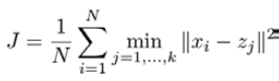

In [ ]:
# N = number of images
N = ytrain.shape[0]

# initialize sum
sum = np.zeros(ytrain.shape[1])

# x = image, z = clusters
for index, v in enumerate(ytrain):
  sum += np.linalg.norm(v - clusters[cluster_affiliations[index]]) ** 2

# calculating J
J = sum / N

# check if all elements in J are same
good = np.all(J == J[0])
print(J)
if good:
  print('Quality Good!')

[27268205.17969801 27268205.17969801 27268205.17969801 27268205.17969801
 27268205.17969801 27268205.17969801 27268205.17969801 27268205.17969801
 27268205.17969801 27268205.17969801 27268205.17969801 27268205.17969801]
Quality Good!


## Checking quality of the final cluster using Davies–Bouldin index

b) Davies–Bouldin index
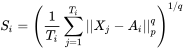

A lower Davies-Bouldin index relates to a model with better 
separation between the clusters. This index signifies the 
average ‘similarity’ between clusters, where the similarity 
is a measure that compares the distance between clusters with 
the size of the clusters themselves. Zero is the lowest possible 
score. Values closer to zero indicate a better partition.

Reference: sklearn documentation

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(ytrain.real, cluster_affiliations.real)
print('Davies Bouldin Index Score: {}'.format(db_score))

Davies Bouldin Index Score: 0.9264377149495084


## Checking quality of the final cluster using Dunn index
c) Dunn index

It is calculated as the lowest intercluster distance (ie. the smallest distance 
between any two cluster centroids) divided by the highest intracluster distance 
(ie. the largest distance between any two points in any cluster).
The higher the value of the Dunn index, the better the aggregation. 
The number of clusters which maximizes the Dunn index is considered to be the 
optimal number of clusters k. It also has some drawbacks. As the number of 
clusters and the dimensionality of the data increase, so does the cost of computation. 
(Reference: 
1. https://en.wikipedia.org/wiki/Dunn_index 
2. https://python.engineering/dunn-index-and-db-index-cluster-validity-indices-set-1/
3. https://mayankdw.medium.com/k-means-clustering-and-dunn-index-implementaion-from-scratch-9c66573bfe90)


In [ ]:
import math

# find euclidean distance between two points 
def find_distance(point, cluster_point):
    distance = math.sqrt(np.sum(np.power(np.subtract(point, cluster_point), 2))) 
    return distance

# find lowest intercluster distance
def get_lowest_intercluster_distance(clusters):
  min_intercluster_distance = float('inf')

  for index_1, cluster_1 in enumerate(clusters):
    for index_2, cluster_2 in enumerate(clusters):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(cluster_1, cluster_2)
        min_intercluster_distance = distance
      
      else:
        if np.any(cluster_1 != cluster_2):
          distance = find_distance(cluster_1, cluster_2)
      
        if distance < min_intercluster_distance:
          min_intercluster_distance = distance
    
    return min_intercluster_distance

# find highest intracluster distance
def get_highest_intracluster_distance(v):
  max_intracluster_distance = float('inf')

  for index_1, point_1 in enumerate(v):
    for index_2, point_2 in enumerate(v):
      distance = float('inf')
      
      if index_1 == 0 and index_2 == 1:
        distance = find_distance(point_1, point_2)
        max_intracluster_distance = distance
      
      else:
        if np.any(point_1 != point_2):
          distance = find_distance(point_1, point_2)
      
        if distance > max_intracluster_distance:
          max_intracluster_distance = distance
    
    return max_intracluster_distance

# find dunn index
def dunn_index(ytrain, clusters):
  lowest_intercluster_distance = get_lowest_intercluster_distance(clusters)

  highest_intracluster_distance = get_highest_intracluster_distance(ytrain)

  return lowest_intercluster_distance/highest_intracluster_distance

dunn_index_score = dunn_index(ytrain.real, clusters)

# Print Dunn Index Score
print('Dunn Index Score: {}'.format(dunn_index_score))


Dunn Index Score: 0.01313210304715204


# Visualizing the Data

In [ ]:
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

## Visualizing Training Set Data

In [ ]:
x = ytrain[:, 0]
y = ytrain[:, 1]
z = ytrain[:, 2]

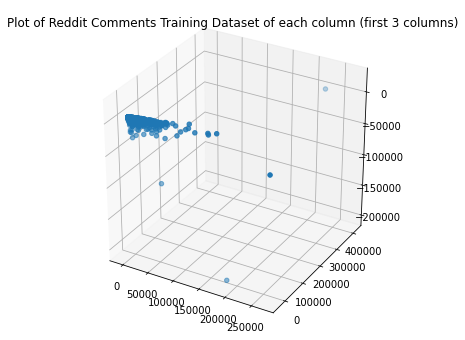

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set_title("Plot of Reddit Comments Training Dataset of each column (first 3 columns)")

plt.show()

## Visualizing Testing Set Data

In [ ]:
x = ytest[:, 0]
y = ytest[:, 1]
z = ytest[:, 2]

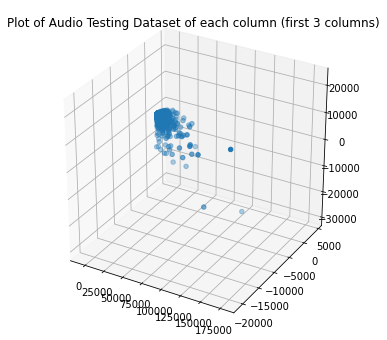

In [ ]:
fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z)
ax.set_title("Plot of Audio Testing Dataset of each column (first 3 columns)")

plt.show()

## Plotting the Clusters found from Kmeans (ytrain)

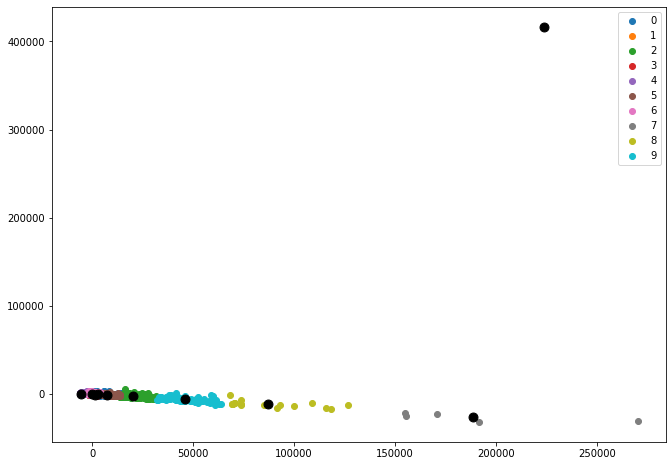

In [ ]:
unique_labels = np.unique(cluster_affiliations)
 
#plotting the results:
fig = plt.figure(figsize=(11, 8)) 
for i in unique_labels:
    plt.scatter(ytrain[cluster_affiliations == i , 0] , ytrain[cluster_affiliations == i , 1] , label = i)
plt.scatter(clusters[:,0] , clusters[:,1] , s = 80, color = 'k')
ax.set_title("2D Plot of Clusters found from KMeans (ytest)")
plt.legend()
plt.show()

## Plotting the Clusters found from Kmeans (ytest)

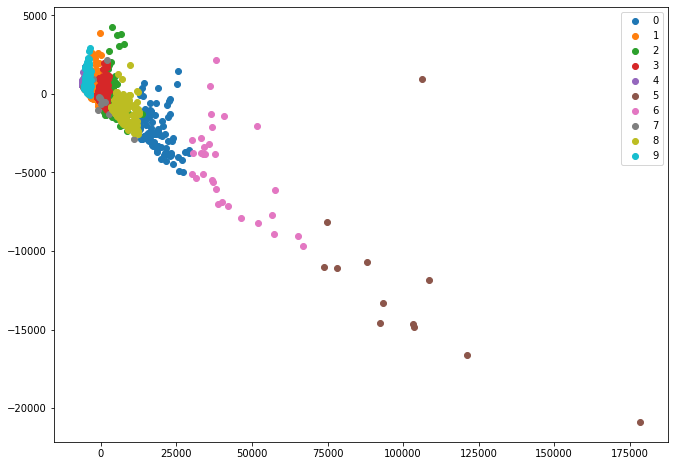

In [ ]:
unique_labels = np.unique(cluster_affiliations)
 
#plotting the results:
fig = plt.figure(figsize=(11, 8)) 
for i in unique_labels:
    plt.scatter(ytest[cluster_affiliations_ytest == i , 0] , ytest[cluster_affiliations_ytest == i , 1] , label = i)
ax.set_title("2D Plot of Clusters found from KMeans (ytest)")
plt.legend()
plt.show()

## 3D Visualization of the Clusters (ytrain)

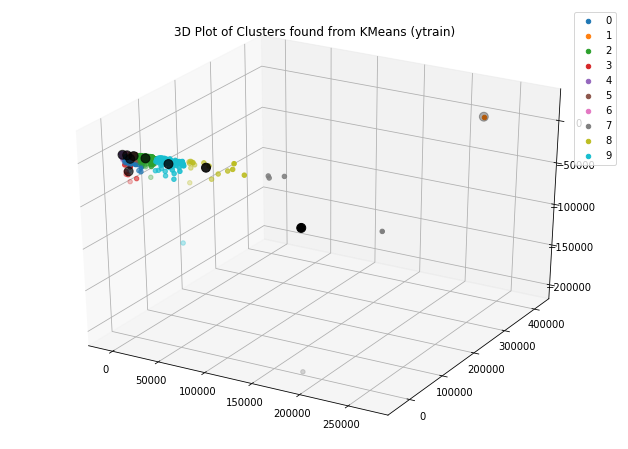

In [ ]:
unique_labels = np.unique(cluster_affiliations)

#plotting the results:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
  ax.scatter(ytrain[cluster_affiliations == i, 0], ytrain[cluster_affiliations == i, 1], ytrain[cluster_affiliations == i, 2], label = i)
ax.scatter(clusters[:, 0] , clusters[:, 1], clusters[:,2], s = 80, color = 'k')
ax.set_title("3D Plot of Clusters found from KMeans (ytrain)")

plt.legend()
plt.show()

## 3D Visualization of the Clusters (ytest)

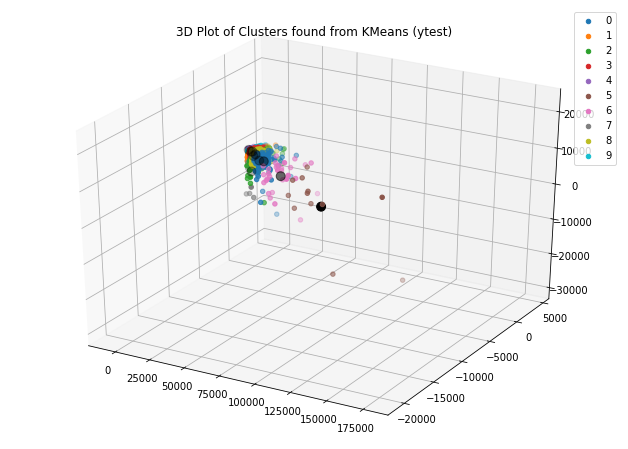

In [ ]:
unique_labels = np.unique(cluster_affiliations_ytest)

#plotting the results:
fig = plt.figure(figsize=(11, 8))
ax = fig.add_subplot(111, projection='3d')

for i in unique_labels:
    ax.scatter(ytest[cluster_affiliations_ytest == i, 0], ytest[cluster_affiliations_ytest == i, 1], ytest[cluster_affiliations_ytest == i, 2], label = i)
ax.scatter(clusters_ytest[:, 0] , clusters_ytest[:, 1], clusters_ytest[:,2], s = 80, color = 'k')
ax.set_title("3D Plot of Clusters found from KMeans (ytest)")

plt.legend()
plt.show()

# Performing SVM

## Performing SVM on original datasets

In [ ]:
from sklearn import svm

In [ ]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

print('Start Time for SVM on Reddit Comments dataset - original dataset - full dataset')
start_time = time.time()

#Train the model using the training sets
clf.fit(training_set, training_labels)

#Predict the response for test dataset
y_pred = clf.predict(testing_set)

print('End Time for SVM on Reddit Comments dataset - original dataset - full dataset')
print("--- %s seconds ---" % (time.time() - start_time))

Start Time for SVM on Reddit Comments dataset - original dataset - full dataset


### Calculating Accuracy Score of original datasets

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, y_pred, normalize=True))

Accuracy: 0.09652683806946324


### Calculating F-1 Score of original datasets

In [ ]:
print("Precision:", metrics.f1_score(testing_labels, y_pred, average='macro'))

Precision: 0.0033762590823903566


## Performing SVM on the reduced datasets

In [ ]:
print('Start Time for SVM on Reddit Comments dataset - reduced dataset')
start_time = time.time()

#Create a svm Classifier
clf = svm.SVC(kernel='rbf')

#Train the model using the training sets
clf.fit(ytrain.real, training_labels)

#Predict the response for test dataset
y_pred = clf.predict(ytest.real)

print('End Time for SVM on Reddit Comments dataset - reduced dataset')
print("--- %s seconds ---" % (time.time() - start_time))

Start Time for SVM on Reddit Comments dataset - reduced dataset
End Time for SVM on Reddit Comments dataset - reduced dataset
--- 60.57840061187744 seconds ---


### Calculating Accuracy Score of reduced datasets

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(testing_labels, y_pred, normalize=True))

Accuracy: 0.07969383160738407


### Calculating F-1 Score of reduced datasets

In [ ]:
print("Precision:", metrics.f1_score(testing_labels, y_pred, average='macro'))

Precision: 0.00017908635604795873


# Writing training and testing sets and labels to file

In [ ]:
path = '/content/drive/MyDrive/Final_Project/reddit_comments_dataset/'

os.chdir(path)

training_set_file = 'training_set.txt'
training_label_file = 'training_label.txt'
testing_set_file = 'testing_set.txt'
testing_label_file = 'testing_label.txt'

fp = open(training_set_file, 'w')

for data in training_set:
  for d in data:
    fp.write("%i," % d)
  fp.write("\n")

fp.close()

In [ ]:
fp = open(training_label_file, 'w')

for data in training_labels:
  fp.write("%s\n" % data)

fp.close()

In [ ]:
fp = open(testing_set_file, 'w')

for data in testing_set:
  for d in data:
    fp.write("%i," % d)
  fp.write("\n")

fp.close()

In [ ]:
fp = open(testing_label_file, 'w')

for data in testing_labels:
  fp.write("%s\n" % data)

fp.close()